In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


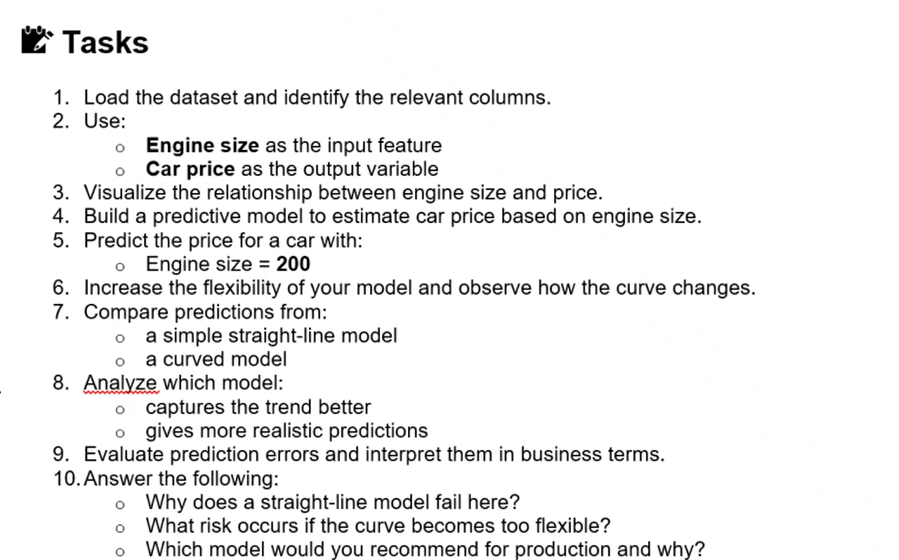

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/CarPrice_Assignment.csv

# Read the CSV file
df = pd.read_csv(file_path)
df = df[['enginesize', 'price']]
df = df.dropna()

df.head()


,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [ ]:
#2.Use
#(a) Engine size as input feature
#(b) Car price as output variable
X = df[['enginesize']]
y = df['price']



In [ ]:
#Train Linear Regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [ ]:
#5: Train Polynomial Regression (Degree = 2)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


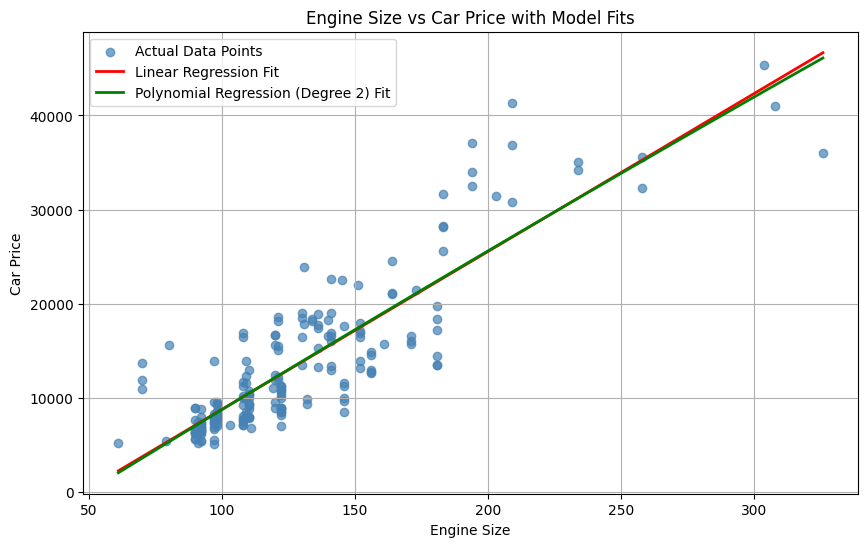

In [ ]:
#6: Plot Linear vs Polynomial (Degree 2)
X_range = np.linspace(
    X.min().values[0],
    X.max().values[0],
    100
).reshape(-1, 1)

plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='steelblue', alpha=0.7, label="Actual Data Points")

plt.plot(
    X_range,
    linear_model.predict(X_range),
    color='red',
    linewidth=2,
    label="Linear Regression Fit"
)

plt.plot(
    X_range,
    poly_model.predict(poly.transform(X_range)),
    color='green',
    linewidth=2,
    label="Polynomial Regression (Degree 2) Fit"
)

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price with Model Fits")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#7: Predict price for engine size = 200
linear_pred_200 = linear_model.predict([[200]])
poly_pred_200 = poly_model.predict(poly.transform([[200]]))

linear_pred_200, poly_pred_200

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


(array([25534.23774749]), array([25591.79170895]))

In [ ]:
#7.Compare predictions from
#(a) Simple straight-line model
#(b) Curved model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

poly_price_200 = poly_model.predict(
    poly.transform([[200]])
)

print("Linear Model Price:", linear_price_200[0])
print("Polynomial Model Price:", poly_price_200[0])

Linear Model Price: 25534.237747489227
Polynomial Model Price: 25591.791708947447


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


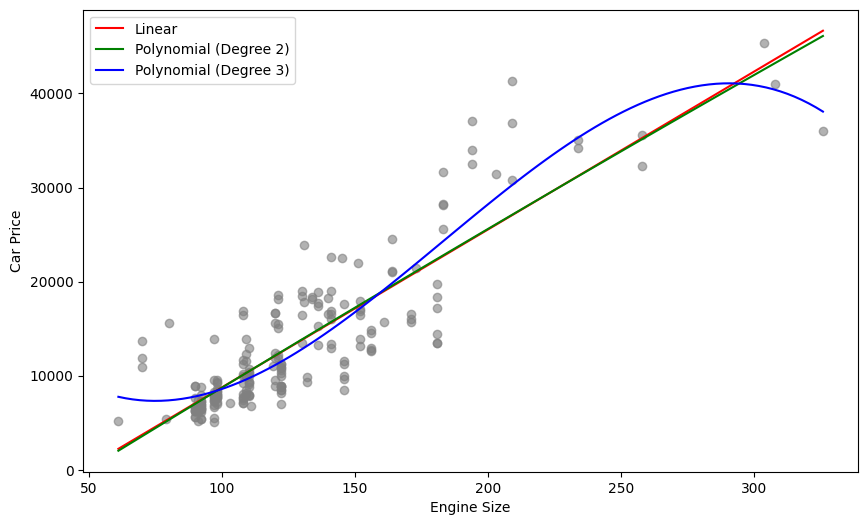

In [ ]:
#9: Compare Linear, Degree-2, Degree-3 models
plt.figure(figsize=(10,6))

plt.scatter(X, y, color='gray', alpha=0.6)

plt.plot(X_range, linear_model.predict(X_range),
         color='red', label='Linear')

plt.plot(X_range, poly_model.predict(poly.transform(X_range)),
         color='green', label='Polynomial (Degree 2)')

plt.plot(X_range, poly3_model.predict(poly3.transform(X_range)),
         color='blue', label='Polynomial (Degree 3)')

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.legend()
plt.show()

In [ ]:
#10: Evaluate models (MSE & R²)
from sklearn.metrics import mean_squared_error, r2_score

y_pred_linear = linear_model.predict(X)
y_pred_poly = poly_model.predict(poly.transform(X))
y_pred_poly3 = poly3_model.predict(poly3.transform(X))

print("Linear MSE:", mean_squared_error(y, y_pred_linear))
print("Poly (deg2) MSE:", mean_squared_error(y, y_pred_poly))
print("Poly (deg3) MSE:", mean_squared_error(y, y_pred_poly3))

print("Linear R2:", r2_score(y, y_pred_linear))
print("Poly (deg2) R2:", r2_score(y, y_pred_poly))
print("Poly (deg3) R2:", r2_score(y, y_pred_poly3))


Linear MSE: 14980261.40555132
Poly (deg2) MSE: 14973637.600078523
Poly (deg3) MSE: 13091524.999302795
Linear R2: 0.7641291357806176
Poly (deg2) R2: 0.7642334305374976
Poly (deg3) R2: 0.7938681287369995


In [ ]:
#11: Final Recommendation
print("Recommended model: Polynomial Regression (Degree 2)")
print("Reason: Better trend capture than linear, less overfitting than higher-degree models.")

Recommended model: Polynomial Regression (Degree 2)
Reason: Better trend capture than linear, less overfitting than higher-degree models.
